In [1]:
import gsd.hoomd
import hoomd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
sim.loggables

NameError: name 'sim' is not defined

In [3]:
thermodynamic_properties = hoomd.md.compute.ThermodynamicQuantities(
    filter=hoomd.filter.All())
sim.operations.computes.append(thermodynamic_properties)
thermodynamic_properties.loggables

NameError: name 'sim' is not defined

In [4]:
logger = hoomd.logging.Logger()

In [5]:
logger.add(thermodynamic_properties)

In [6]:
logger.add(sim, quantities=['timestep', 'walltime'])

NameError: name 'sim' is not defined

In [7]:
gsd_writer = hoomd.write.GSD(filename='log.gsd',
                             trigger=hoomd.trigger.Periodic(1000),
                             mode='xb',
                             filter=hoomd.filter.Null())
sim.operations.writers.append(gsd_writer)

NameError: name 'sim' is not defined

In [8]:
gsd_writer.log = logger

In [9]:
sim.run(100000)

NameError: name 'sim' is not defined

In [10]:
traj = gsd.hoomd.open('log.gsd', 'rb')

ValueError: Invalid mode: rb

In [11]:
traj[0].log

NameError: name 'traj' is not defined

In [12]:
timestep = []
walltime = []
potential_energy = []

for frame in traj:
    timestep.append(frame.configuration.step)
    walltime.append(frame.log['Simulation/walltime'][0])
    potential_energy.append(
        frame.log['md/compute/ThermodynamicQuantities/potential_energy'][0])

NameError: name 'traj' is not defined

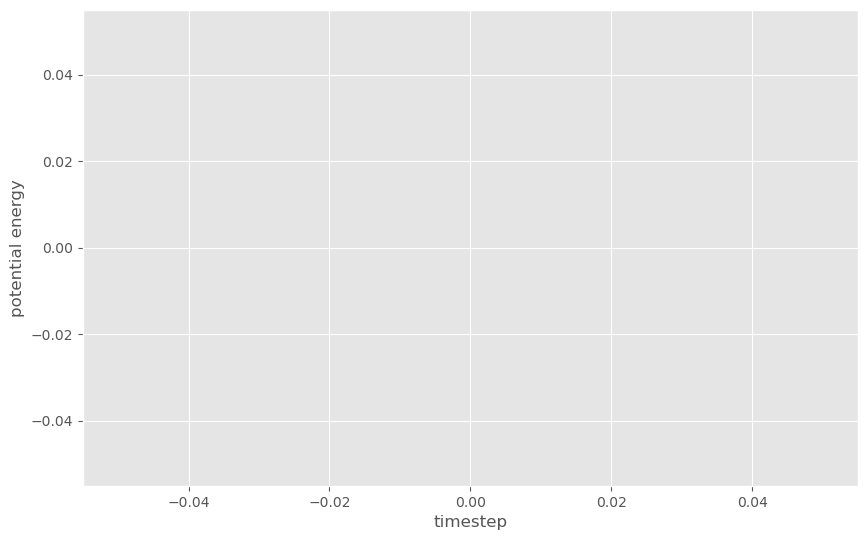

In [13]:
fig = matplotlib.figure.Figure(figsize=(10, 6.18))
ax = fig.add_subplot()
ax.plot(timestep, potential_energy)
ax.set_xlabel('timestep')
ax.set_ylabel('potential energy')
fig